# Optimal capacity

This notebook contains different visualization of the online and built capacity.

In [159]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports                                                     
from utils import get_data
from utils import get_data_sftp
from utils import tech_order, tech_colors

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


#### Notebook constants

In [160]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ["scenario_190", "scenario_191", "scenario_192", "scenario_193", "scenario_194", "scenario_195", "scenario_196", "scenario_197",
                 "scenario_198", "scenario_199"]
savefig = False
folder_to_save_results="results/"

In [161]:
figure_names={"scenario_190": "1" , "scenario_191": "2" ,"scenario_192": "3", "scenario_193": "4", "scenario_194" : "5", "scenario_195": "6",
              "scenario_196" : "7" , "scenario_197" : "8", "scenario_198" : "9", "scenario_199": "10"}

## Reading scenario results

In [162]:
# Name of output/input file to read
fname = "generation_projects_info.csv"

# Selection of columns from input/output files. This speeds-up
# reading time.
columns = [
    "GENERATION_PROJECT",
    "gen_load_zone",
    "gen_tech",
    "gen_min_build_capacity",
    "gen_capacity_limit_mw",
]

# Get generation projects info csv
gen_projects = get_data_sftp(hostname, username, scenario_name, fname, fpath="inputs", usecols=columns)


In [163]:
gen_projects=gen_projects.replace({"scenario": figure_names})
gen_projects = gen_projects.astype({'scenario':'int'})
gen_projects

,GENERATION_PROJECT,gen_tech,gen_load_zone,gen_capacity_limit_mw,gen_min_build_capacity,tech_map,scenario
0,77333,Wind,CA_SCE_CEN,43.0,0.0,Wind,1
1,77334,Wind,CA_SCE_CEN,50.0,0.0,Wind,1
2,77335,Wind,CA_SCE_CEN,49.0,0.0,Wind,1
3,77336,Wind,CA_SCE_CEN,92.0,0.0,Wind,1
4,77337,Wind,CA_SCE_CEN,66.0,0.0,Wind,1
...,...,...,...,...,...,...,...
10521,1300000195,Offshore_Wind,CA_PGE_S,338.8889125,0.0,Offshore_Wind,10
10522,1300000196,Offshore_Wind,CA_SCE_CEN,1207.070682,0.0,Offshore_Wind,10
10523,1300000197,Offshore_Wind,CA_SCE_S,1709.852353,0.0,Offshore_Wind,10
10524,1300000198,Offshore_Wind,CA_SCE_CEN,2295.192347,0.0,Offshore_Wind,10


In [164]:
set(gen_projects['tech_map'])

{'Biomass',
 'CSP',
 'Coal',
 'Geothermal',
 'Hydro',
 'Nuclear',
 'Offshore_Wind',
 'Pumped Hydro',
 'Solar',
 'Storage',
 'Thermal',
 'Wave',
 'Wind'}

In [165]:
# Name of output/input file to read
fname = "gen_cap.csv"

columns = [
    "GENERATION_PROJECT",
    "PERIOD",
    "gen_tech",
    "gen_load_zone",
    "GenCapacity",
]

#Get buildGen csv
gen_cap = get_data_sftp(hostname, username, scenario_name, fname, usecols=columns)
gen_cap=gen_cap.replace({"scenario": figure_names})
gen_cap = gen_cap.astype({'scenario':'int'})
gen_cap


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,77333,2020,Wind,CA_SCE_CEN,0.00,Wind,1
1,77333,2030,Wind,CA_SCE_CEN,0.00,Wind,1
2,77333,2040,Wind,CA_SCE_CEN,43.00,Wind,1
3,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
4,77334,2020,Wind,CA_SCE_CEN,0.00,Wind,1
...,...,...,...,...,...,...,...
36433,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,10
36434,1300000199,2020,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,10
36435,1300000199,2030,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,10
36436,1300000199,2040,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,10


### Enter the year to analyze

In [166]:
analysis_year=2050
year_gen_cap=gen_cap.copy()
year_gen_cap=gen_cap[gen_cap['PERIOD']==analysis_year]
year_gen_cap.reset_index(inplace=True,drop=True)
year_gen_cap

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
1,77334,2050,Wind,CA_SCE_CEN,50.00,Wind,1
2,77335,2050,Wind,CA_SCE_CEN,49.00,Wind,1
3,77336,2050,Wind,CA_SCE_CEN,92.00,Wind,1
4,77337,2050,Wind,CA_SCE_CEN,66.00,Wind,1
...,...,...,...,...,...,...,...
82855,1300000195,2050,Offshore_Wind,CA_PGE_S,338.89,Offshore_Wind,10
82856,1300000196,2050,Offshore_Wind,CA_SCE_CEN,0.00,Offshore_Wind,10
82857,1300000197,2050,Offshore_Wind,CA_SCE_S,0.00,Offshore_Wind,10
82858,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",Offshore_Wind,10


## Data transformations

In [167]:
# MW to GW
year_gen_cap.insert(5,"GenCapacity_GW",year_gen_cap["GenCapacity"] / 1e3  )
year_gen_cap


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,GenCapacity_GW,tech_map,scenario
0,77333,2050,Wind,CA_SCE_CEN,43.00,0.04,Wind,1
1,77334,2050,Wind,CA_SCE_CEN,50.00,0.05,Wind,1
2,77335,2050,Wind,CA_SCE_CEN,49.00,0.05,Wind,1
3,77336,2050,Wind,CA_SCE_CEN,92.00,0.09,Wind,1
4,77337,2050,Wind,CA_SCE_CEN,66.00,0.07,Wind,1
...,...,...,...,...,...,...,...,...
82855,1300000195,2050,Offshore_Wind,CA_PGE_S,338.89,0.34,Offshore_Wind,10
82856,1300000196,2050,Offshore_Wind,CA_SCE_CEN,0.00,0.00,Offshore_Wind,10
82857,1300000197,2050,Offshore_Wind,CA_SCE_S,0.00,0.00,Offshore_Wind,10
82858,1300000198,2050,Offshore_Wind,CA_SCE_CEN,"2,295.20",2.30,Offshore_Wind,10


## Generation capacity in WECC

In [168]:
year_gen_cap_by_scenario = year_gen_cap.pivot_table(
    index=["scenario"],
    columns="tech_map",
    values="GenCapacity_GW",
    aggfunc=np.sum,
)

#year_gen_cap_by_scenario.columns = year_gen_cap_by_scenario.columns.add_categories(['Total_GW'])
year_gen_cap_by_scenario.reindex(columns=["tech_map"])
year_gen_cap_by_scenario = year_gen_cap_by_scenario#.fillna(0)
year_gen_cap_by_scenario.loc[:,'Total_GW']=year_gen_cap_by_scenario.apply(lambda x: sum(x[c] for c in year_gen_cap_by_scenario.columns), axis=1)
year_gen_cap_by_scenario.sort_index(axis=1,ascending=True,inplace=True)
#year_gen_cap_by_scenario = year_gen_cap_by_scenario[['Biomass','CSP','Coal','Geothermal','Hydro','Nuclear','Offshore_Wind','Pumped Hydro','Solar','Storage','Thermal','Wave','Wind','Total_GW']]
year_gen_cap_by_scenario.T.to_latex(folder_to_save_results+"Generation capacity in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Generation capacity in WECC")
year_gen_cap_by_scenario

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_41985/1717201749.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  year_gen_cap_by_scenario.T.to_latex(folder_to_save_results+"Generation capacity in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,9.16,0.00,1.71,0.00,63.33,5.41,57.10,4.33,226.83,112.31,46.48,694.17,2.38,165.11
2,9.42,0.00,1.71,0.00,63.33,5.41,55.46,4.33,224.29,111.28,46.40,693.13,6.42,165.08
3,10.21,0.00,1.71,0.00,63.33,5.41,52.99,4.33,218.50,109.08,46.10,691.62,14.86,165.09
4,10.60,0.00,1.71,0.00,63.33,5.41,53.12,4.33,215.06,107.54,45.77,690.92,22.86,161.18
5,10.62,0.00,1.71,0.00,63.33,5.41,53.23,4.33,214.01,106.72,45.73,691.39,26.26,160.03
6,9.89,0.00,1.71,0.00,63.33,5.41,48.21,4.33,230.94,113.44,45.76,701.41,4.18,174.20
7,9.88,0.00,1.71,0.00,63.33,5.41,49.91,4.33,223.70,110.80,46.03,696.19,9.34,171.74
8,10.41,0.00,1.71,0.00,63.33,5.41,52.82,4.33,215.52,107.52,46.06,690.05,15.93,167.00
9,10.68,0.00,1.71,0.00,63.33,5.41,56.78,4.33,211.63,105.28,45.93,687.45,22.86,159.51


In [169]:
latex_code = year_gen_cap_by_scenario.T.to_latex(index=False)

latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{tabular}{rrrrrrrrrr}
\toprule
    1  &     2  &     3  &     4  &     5  &     6  &     7  &     8  &     9  &     10 \\ \hline
  9.16 &   9.42 &  10.21 &  10.60 &  10.62 &   9.89 &   9.88 &  10.41 &  10.68 &  10.57 \\ \hline
\midrule
  0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 \\ \hline
  1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 &   1.71 \\ \hline
  0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 &   0.00 \\ \hline
 63.33 &  63.33 &  63.33 &  63.33 &  63.33 &  63.33 &  63.33 &  63.33 &  63.33 &  63.33 \\ \hline
  5.41 &   5.41 &   5.41 &   5.41 &   5.41 &   5.41 &   5.41 &   5.41 &   5.41 &   5.41 \\ \hline
 57.10 &  55.46 &  52.99 &  53.12 &  53.23 &  48.21 &  49.91 &  52.82 &  56.78 &  60.35 \\ \hline
  4.33 &   4.33 &   4.33 &   4.33 &   4.33 &   4.33 &   4.33 &   4.33 &   4.33 &   4.33 \\ \hline
226.83 & 224.29 & 218.50 & 215.06 & 214.01 & 230.94 & 223.70 & 215.52 & 

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_41985/314988464.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = year_gen_cap_by_scenario.T.to_latex(index=False)


In [170]:
sc= list(year_gen_cap_by_scenario.index)
plot_1=sc[0:int(round(len(sc)/2,0))]
plot_2=sc[int(round(len(sc)/2,0)):int(len(sc))]
group_1 = year_gen_cap_by_scenario.loc[plot_1,:]
group_2 = year_gen_cap_by_scenario.loc[plot_2,:]

# sc= list(year_gen_cap_by_scenario.index)
# p0 = sc[0]
# plot_1=sc[0:int(round(len(sc)/2,0))]
# plot_2=[p0]+ sc[int(round(len(sc)/2,0)):int(len(sc))]
# group_1 = year_gen_cap_by_scenario.loc[plot_1,:]
# group_2 = year_gen_cap_by_scenario.loc[plot_2,:]

In [171]:
group_1

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,9.16,0.00,1.71,0.00,63.33,5.41,57.10,4.33,226.83,112.31,46.48,694.17,2.38,165.11
2,9.42,0.00,1.71,0.00,63.33,5.41,55.46,4.33,224.29,111.28,46.40,693.13,6.42,165.08
3,10.21,0.00,1.71,0.00,63.33,5.41,52.99,4.33,218.50,109.08,46.10,691.62,14.86,165.09
4,10.60,0.00,1.71,0.00,63.33,5.41,53.12,4.33,215.06,107.54,45.77,690.92,22.86,161.18
5,10.62,0.00,1.71,0.00,63.33,5.41,53.23,4.33,214.01,106.72,45.73,691.39,26.26,160.03


In [172]:
group_2

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
6,9.89,0.00,1.71,0.00,63.33,5.41,48.21,4.33,230.94,113.44,45.76,701.41,4.18,174.20
7,9.88,0.00,1.71,0.00,63.33,5.41,49.91,4.33,223.70,110.80,46.03,696.19,9.34,171.74
8,10.41,0.00,1.71,0.00,63.33,5.41,52.82,4.33,215.52,107.52,46.06,690.05,15.93,167.00
9,10.68,0.00,1.71,0.00,63.33,5.41,56.78,4.33,211.63,105.28,45.93,687.45,22.86,159.51
10,10.57,0.00,1.71,0.00,63.33,5.41,60.35,4.33,205.04,102.12,45.86,682.35,26.14,157.49


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,9.16,0.00,1.71,0.00,63.33,5.41,57.10,4.33,226.83,112.31,46.48,694.17,2.38,165.11
2,9.42,0.00,1.71,0.00,63.33,5.41,55.46,4.33,224.29,111.28,46.40,693.13,6.42,165.08
3,10.21,0.00,1.71,0.00,63.33,5.41,52.99,4.33,218.50,109.08,46.10,691.62,14.86,165.09
4,10.60,0.00,1.71,0.00,63.33,5.41,53.12,4.33,215.06,107.54,45.77,690.92,22.86,161.18
5,10.62,0.00,1.71,0.00,63.33,5.41,53.23,4.33,214.01,106.72,45.73,691.39,26.26,160.03


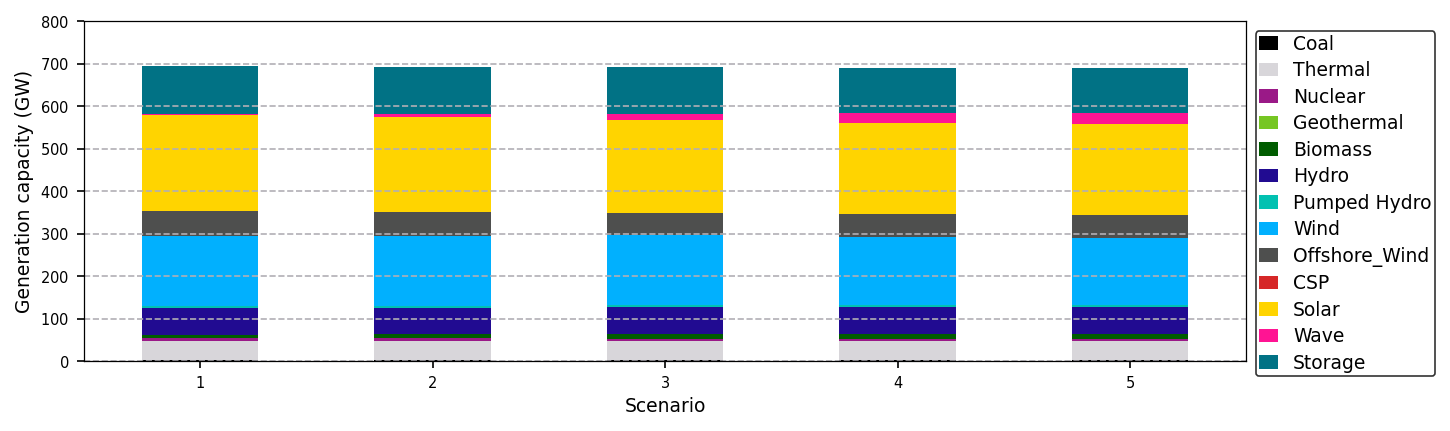

In [173]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_1[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in WECC Scenarios 190-194.png", transparent=False)

#Rename for spaces purposes
#data=gen_cap_by_scenario.rename(index={"Baseline":"Base",
                                     #  "Period_rate_90":"Period_90",
                                     #  "Period_rate_100":"Period_100",
                                     #  "Timepoint_rate_100":"Tp_100",
                                     #  "Zero_tx_expansion": "ZeroTxExp",
                                     #  "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
#data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in WECC.tex",index=True,
                                #  float_format='%.2f',
                                # caption="Generation capacity (GW) in WECC")

#Show dataframe
group_1

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
6,9.89,0.00,1.71,0.00,63.33,5.41,48.21,4.33,230.94,113.44,45.76,701.41,4.18,174.20
7,9.88,0.00,1.71,0.00,63.33,5.41,49.91,4.33,223.70,110.80,46.03,696.19,9.34,171.74
8,10.41,0.00,1.71,0.00,63.33,5.41,52.82,4.33,215.52,107.52,46.06,690.05,15.93,167.00
9,10.68,0.00,1.71,0.00,63.33,5.41,56.78,4.33,211.63,105.28,45.93,687.45,22.86,159.51
10,10.57,0.00,1.71,0.00,63.33,5.41,60.35,4.33,205.04,102.12,45.86,682.35,26.14,157.49


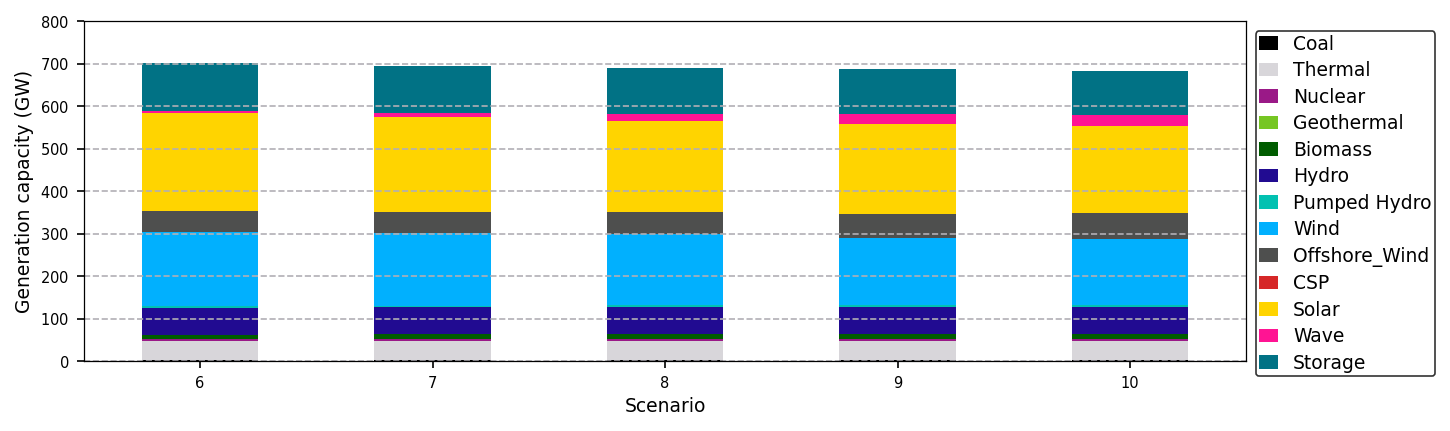

In [174]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = group_2[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in WECC Scenarios 195-199.png", transparent=False)

#Rename for spaces purposes
#data=gen_cap_by_scenario.rename(index={"Baseline":"Base",
                                     #  "Period_rate_90":"Period_90",
                                     #  "Period_rate_100":"Period_100",
                                     #  "Timepoint_rate_100":"Tp_100",
                                     #  "Zero_tx_expansion": "ZeroTxExp",
                                     #  "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
#data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in WECC.tex",index=True,
                                #  float_format='%.2f',
                                # caption="Generation capacity (GW) in WECC")

#Show dataframe
group_2

In [175]:
year_gen_cap_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Total_GW,Wave,Wind
scenario,,,,,,,,,,,,,,
1,9.16,0.00,1.71,0.00,63.33,5.41,57.10,4.33,226.83,112.31,46.48,694.17,2.38,165.11
2,9.42,0.00,1.71,0.00,63.33,5.41,55.46,4.33,224.29,111.28,46.40,693.13,6.42,165.08
3,10.21,0.00,1.71,0.00,63.33,5.41,52.99,4.33,218.50,109.08,46.10,691.62,14.86,165.09
4,10.60,0.00,1.71,0.00,63.33,5.41,53.12,4.33,215.06,107.54,45.77,690.92,22.86,161.18
5,10.62,0.00,1.71,0.00,63.33,5.41,53.23,4.33,214.01,106.72,45.73,691.39,26.26,160.03
6,9.89,0.00,1.71,0.00,63.33,5.41,48.21,4.33,230.94,113.44,45.76,701.41,4.18,174.20
7,9.88,0.00,1.71,0.00,63.33,5.41,49.91,4.33,223.70,110.80,46.03,696.19,9.34,171.74
8,10.41,0.00,1.71,0.00,63.33,5.41,52.82,4.33,215.52,107.52,46.06,690.05,15.93,167.00
9,10.68,0.00,1.71,0.00,63.33,5.41,56.78,4.33,211.63,105.28,45.93,687.45,22.86,159.51


In [176]:
techs = gen_projects['tech_map'].unique()
techs

['Wind', 'Thermal', 'Hydro', 'Coal', 'Pumped Hydro', ..., 'Biomass', 'Storage', 'CSP', 'Offshore_Wind', 'Wave']
Length: 13
Categories (13, object): ['Biomass', 'CSP', 'Coal', 'Geothermal', ..., 'Storage', 'Thermal', 'Wave', 'Wind']

In [177]:
build_gen_cap_by_scenario_percentage = year_gen_cap_by_scenario.copy()
for t in techs:
    build_gen_cap_by_scenario_percentage.loc[:,t] = build_gen_cap_by_scenario_percentage.apply(lambda x:x[t]*100/x['Total_GW'], axis=1)
build_gen_cap_by_scenario_percentage.drop(columns='Total_GW', axis=1, inplace=True)

build_gen_cap_by_scenario_percentage.loc[:,'Total']=build_gen_cap_by_scenario_percentage.apply(lambda x: sum(x[c] for c in build_gen_cap_by_scenario_percentage.columns), axis=1)
build_gen_cap_by_scenario_percentage.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in WECC.tex",index=True,
                                  float_format='%.1f',
                                  caption="Generation capacity (percentage) in WECC")
build_gen_cap_by_scenario_percentage

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_41985/1965211326.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  build_gen_cap_by_scenario_percentage.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in WECC.tex",index=True,


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,Total
scenario,,,,,,,,,,,,,,
1,1.32,0.00,0.25,0.00,9.12,0.78,8.23,0.62,32.68,16.18,6.70,0.34,23.79,100.00
2,1.36,0.00,0.25,0.00,9.14,0.78,8.00,0.62,32.36,16.05,6.69,0.93,23.82,100.00
3,1.48,0.00,0.25,0.00,9.16,0.78,7.66,0.63,31.59,15.77,6.67,2.15,23.87,100.00
4,1.53,0.00,0.25,0.00,9.17,0.78,7.69,0.63,31.13,15.57,6.63,3.31,23.33,100.00
5,1.54,0.00,0.25,0.00,9.16,0.78,7.70,0.63,30.95,15.44,6.61,3.80,23.15,100.00
6,1.41,0.00,0.24,0.00,9.03,0.77,6.87,0.62,32.93,16.17,6.52,0.60,24.84,100.00
7,1.42,0.00,0.25,0.00,9.10,0.78,7.17,0.62,32.13,15.92,6.61,1.34,24.67,100.00
8,1.51,0.00,0.25,0.00,9.18,0.78,7.65,0.63,31.23,15.58,6.68,2.31,24.20,100.00
9,1.55,0.00,0.25,0.00,9.21,0.79,8.26,0.63,30.78,15.32,6.68,3.33,23.20,100.00


In [178]:
#Computing percentages
x=np.zeros((len(scenario_name),len(year_gen_cap_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(year_gen_cap_by_scenario.columns)):
      x[c,tec]=100*year_gen_cap_by_scenario.loc[fig[c],year_gen_cap_by_scenario.columns[tec]]/year_gen_cap_by_scenario.loc[scenario_name[c],year_gen_cap_by_scenario.columns[len(year_gen_cap_by_scenario.columns)-1]]

build_gen_ca_by_scenario_percentage=pd.DataFrame(x,columns=year_gen_cap_by_scenario.columns,index=[scenario_name])

data=build_gen_ca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in WECC.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (percentage) in WECC")
data

TypeError: 'Figure' object is not subscriptable

## Generation capacity in California

In [ ]:
#Filter the BuildGen.csv to obtain generation in California
gen_cap_ca=year_gen_cap[year_gen_cap.gen_load_zone.str.startswith('CA_')]

gen_cap_ca_by_scenario = gen_cap_ca.pivot_table(
    index=["scenario"],
    columns="tech_map",
    values="GenCapacity_GW",
    aggfunc=np.sum,
)

#Sort the pivot table by index according to the scenario_name

gen_cap_ca_by_scenario.columns = gen_cap_ca_by_scenario.columns.add_categories(['indexNumber'])
gen_cap_ca_by_scenario['indexNumber']=[scenario_name.index(gen_cap_ca_by_scenario.index[i]) for i in range(0,len(scenario_name))]
gen_cap_ca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del gen_cap_ca_by_scenario['indexNumber']
gen_cap_ca_by_scenario.columns = gen_cap_ca_by_scenario.columns.add_categories(['total_GW'])
gen_cap_ca_by_scenario['total_GW']=[gen_cap_ca_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario,,,,,,,,,,,,,,
scenario_190,4.74,0.00,0.00,0.00,9.92,0.00,41.48,3.31,84.29,47.99,19.73,1.71,4.82,217.98
scenario_191,4.89,0.00,0.00,0.00,9.92,0.00,41.00,3.31,81.93,47.08,19.43,3.90,4.86,216.32
scenario_192,5.48,0.00,0.00,0.00,9.92,0.00,40.32,3.31,78.02,45.85,19.26,7.43,4.98,214.57
scenario_193,5.70,0.00,0.00,0.00,9.92,0.00,40.40,3.31,77.52,44.52,18.82,11.55,4.98,216.73
scenario_194,5.71,0.00,0.00,0.00,9.92,0.00,40.18,3.31,76.70,43.77,18.71,13.37,4.98,216.66
scenario_195,5.35,0.00,0.00,0.00,9.92,0.00,38.19,3.31,87.31,49.55,20.02,2.68,6.09,222.40
scenario_196,5.26,0.00,0.00,0.00,9.92,0.00,38.94,3.31,81.91,47.09,19.90,5.83,5.67,217.83
scenario_197,5.60,0.00,0.00,0.00,9.92,0.00,40.77,3.31,76.99,45.19,19.66,8.49,4.98,214.91
scenario_198,5.72,0.00,0.00,0.00,9.92,0.00,42.04,3.31,75.46,42.87,19.57,11.55,4.98,215.41


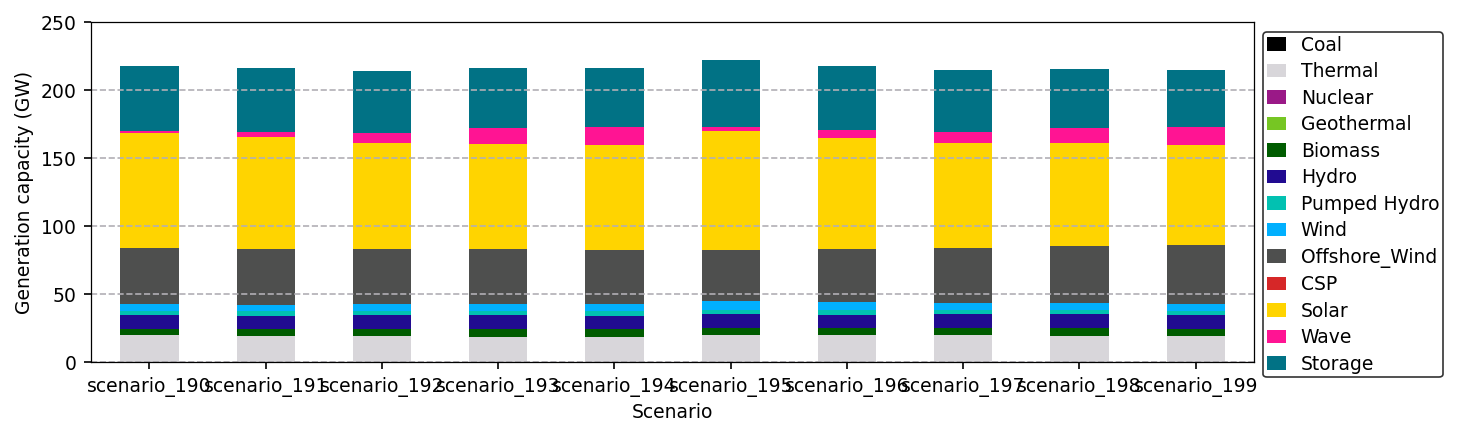

In [ ]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = gen_cap_ca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) in California.png", transparent=False)

#Rename for spaces purposes
data=gen_cap_ca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Generation capacity (GW) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (GW) in WECC")

#Show dataframe
gen_cap_ca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(gen_cap_ca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(gen_cap_ca_by_scenario.columns)):
      x[c,tec]=100*gen_cap_ca_by_scenario.loc[scenario_name[c],gen_cap_ca_by_scenario.columns[tec]]/gen_cap_ca_by_scenario.loc[scenario_name[c],gen_cap_ca_by_scenario.columns[len(gen_cap_ca_by_scenario.columns)-1]]

build_gen_ca_by_scenario_percentage=pd.DataFrame(x,columns=gen_cap_ca_by_scenario.columns,index=[scenario_name])

data=build_gen_ca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Generation capacity (percentage) in California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (percentage) in California")
data

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario_190,2.17,0.00,0.00,0.00,4.55,0.00,19.03,1.52,38.67,22.02,9.05,0.79,2.21,100.00
scenario_191,2.26,0.00,0.00,0.00,4.58,0.00,18.95,1.53,37.88,21.76,8.98,1.81,2.25,100.00
scenario_192,2.56,0.00,0.00,0.00,4.62,0.00,18.79,1.54,36.36,21.37,8.97,3.46,2.32,100.00
scenario_193,2.63,0.00,0.00,0.00,4.57,0.00,18.64,1.53,35.77,20.54,8.68,5.33,2.30,100.00
scenario_194,2.63,0.00,0.00,0.00,4.58,0.00,18.55,1.53,35.40,20.20,8.64,6.17,2.30,100.00
scenario_195,2.40,0.00,0.00,0.00,4.46,0.00,17.17,1.49,39.26,22.28,9.00,1.21,2.74,100.00
scenario_196,2.42,0.00,0.00,0.00,4.55,0.00,17.87,1.52,37.60,21.62,9.13,2.68,2.60,100.00
scenario_197,2.60,0.00,0.00,0.00,4.61,0.00,18.97,1.54,35.82,21.03,9.15,3.95,2.32,100.00
scenario_198,2.65,0.00,0.00,0.00,4.60,0.00,19.52,1.54,35.03,19.90,9.08,5.36,2.31,100.00
scenario_199,2.59,0.00,0.00,0.00,4.61,0.00,20.20,1.54,34.09,19.54,8.81,6.30,2.32,100.00


## Generation capacity out of California

In [ ]:
zones_ca=gen_cap[gen_cap["scenario"].isin([scenario_name[0]])]
zones_ca=list(zones_ca[zones_ca.gen_load_zone.str.startswith('CA_')].gen_load_zone)
gen_cap_ca_outca=gen_cap[~gen_cap["gen_load_zone"].isin(zones_ca)]
gen_cap_ca_outca

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
484,77454,2020,Wind,OR_E,0.00,Wind,scenario_190
485,77454,2030,Wind,OR_E,0.00,Wind,scenario_190
486,77454,2040,Wind,OR_E,0.00,Wind,scenario_190
487,77454,2050,Wind,OR_E,0.00,Wind,scenario_190
488,77455,2020,Wind,OR_E,0.00,Wind,scenario_190
...,...,...,...,...,...,...,...
36213,1300000143,2050,Offshore_Wind,OR_W,852.98,Offshore_Wind,scenario_199
36214,1300000144,2020,Offshore_Wind,OR_W,0.00,Offshore_Wind,scenario_199
36215,1300000144,2030,Offshore_Wind,OR_W,0.00,Offshore_Wind,scenario_199
36216,1300000144,2040,Offshore_Wind,OR_W,0.00,Offshore_Wind,scenario_199


In [ ]:
gen_cap_ca_outca_by_scenario = gen_cap_ca_outca.pivot_table(
    index=["scenario"],
    columns="tech_map",
    values="GenCapacity",
    aggfunc=np.sum,
)
gen_cap_ca_outca_by_scenario.columns = gen_cap_ca_outca_by_scenario.columns.add_categories(['total_GW'])
gen_cap_ca_outca_by_scenario['total_GW']=[gen_cap_ca_outca_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]
gen_cap_ca_outca_by_scenario.columns = gen_cap_ca_outca_by_scenario.columns.add_categories(['indexNumber'])
gen_cap_ca_outca_by_scenario['indexNumber']=[scenario_name.index(gen_cap_ca_outca_by_scenario.index[i]) for i in range(0,len(scenario_name))]
gen_cap_ca_outca_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del gen_cap_ca_outca_by_scenario['indexNumber']

gen_cap_ca_outca_by_scenario

tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario,,,,,,,,,,,,,,
scenario_190,"8,109.14",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","23,368.32","4,066.40","273,853.19","64,432.46","212,670.08","18,151.52","312,796.71","1,189,442.71"
scenario_191,"8,213.10",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","21,906.27","4,066.40","274,490.91","64,308.44","213,347.30","23,922.64","309,916.04","1,192,166.00"
scenario_192,"8,420.99",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,949.02","4,066.40","272,928.80","63,348.83","212,941.43","38,166.56","304,355.39","1,195,172.30"
scenario_193,"8,594.07",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,780.57","4,066.40","269,684.58","63,129.53","213,267.58","47,462.04","296,955.71","1,193,935.38"
scenario_194,"8,599.18",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,985.36","4,066.40","268,903.04","63,055.98","213,471.73","51,574.60","294,296.90","1,194,948.10"
scenario_195,"8,349.04",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","13,328.70","4,066.40","276,704.97","64,007.82","209,641.24","19,446.20","331,864.25","1,199,403.52"
scenario_196,"8,362.20",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","15,216.27","4,066.40","273,071.32","63,821.26","210,857.51","25,918.94","324,131.73","1,197,440.51"
scenario_197,"8,512.64",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","17,102.64","4,066.40","268,025.43","62,443.19","211,628.37","38,190.59","312,654.60","1,194,618.75"
scenario_198,"8,650.58",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","20,672.84","4,066.40","265,331.66","62,641.60","211,511.57","47,462.04","298,735.01","1,191,066.60"


tech_map,Biomass,CSP,Coal,Geothermal,Hydro,Nuclear,Offshore_Wind,Pumped Hydro,Solar,Storage,Thermal,Wave,Wind,total_GW
scenario,,,,,,,,,,,,,,
scenario_190,"8,109.14",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","23,368.32","4,066.40","273,853.19","64,432.46","212,670.08","18,151.52","312,796.71","1,189,442.71"
scenario_191,"8,213.10",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","21,906.27","4,066.40","274,490.91","64,308.44","213,347.30","23,922.64","309,916.04","1,192,166.00"
scenario_192,"8,420.99",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,949.02","4,066.40","272,928.80","63,348.83","212,941.43","38,166.56","304,355.39","1,195,172.30"
scenario_193,"8,594.07",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,780.57","4,066.40","269,684.58","63,129.53","213,267.58","47,462.04","296,955.71","1,193,935.38"
scenario_194,"8,599.18",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","18,985.36","4,066.40","268,903.04","63,055.98","213,471.73","51,574.60","294,296.90","1,194,948.10"
scenario_195,"8,349.04",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","13,328.70","4,066.40","276,704.97","64,007.82","209,641.24","19,446.20","331,864.25","1,199,403.52"
scenario_196,"8,362.20",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","15,216.27","4,066.40","273,071.32","63,821.26","210,857.51","25,918.94","324,131.73","1,197,440.51"
scenario_197,"8,512.64",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","17,102.64","4,066.40","268,025.43","62,443.19","211,628.37","38,190.59","312,654.60","1,194,618.75"
scenario_198,"8,650.58",810.00,"34,643.10","1,238.20","213,665.20","21,638.40","20,672.84","4,066.40","265,331.66","62,641.60","211,511.57","47,462.04","298,735.01","1,191,066.60"


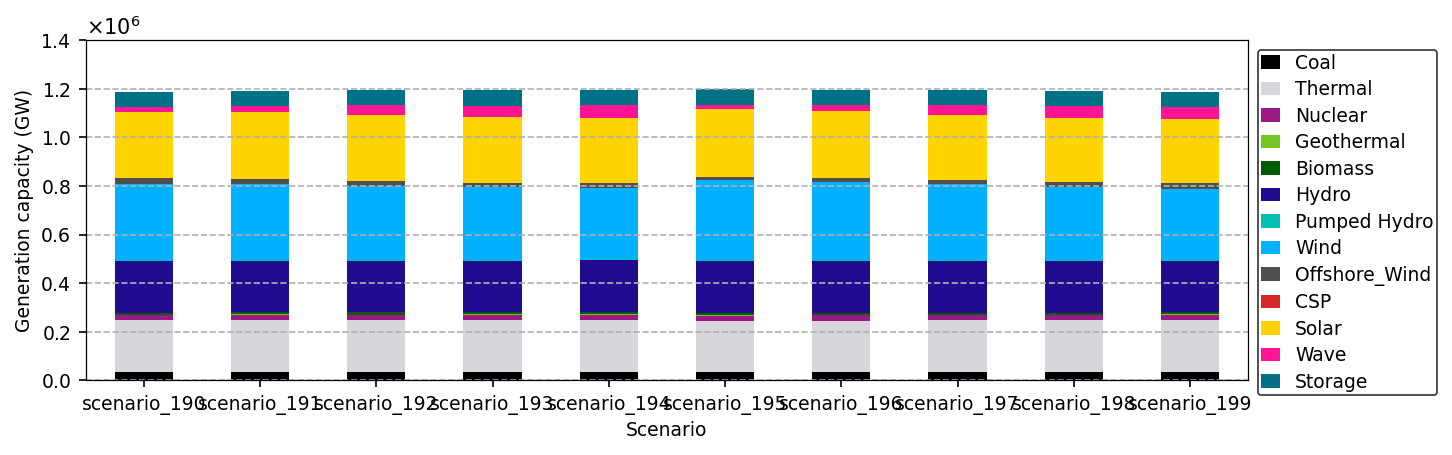

In [ ]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(10,3), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = gen_cap_ca_outca_by_scenario[tech_order].plot.bar(stacked=True,ax=ax, color=tech_colors, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Generation capacity (GW)", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Generation capacity (GW) out of California.png", transparent=False)

#Rename for spaces purposes
data=gen_cap_ca_outca_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Generation capacity (GW) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (GW) out of California")

#Show dataframe
gen_cap_ca_outca_by_scenario

In [ ]:
#Computing percentages
x=np.zeros((len(scenario_name),len(gen_cap_ca_outca_by_scenario.columns)))
for c in range(0,len(scenario_name)):
    for tec in range(0,len(gen_cap_ca_outca_by_scenario.columns)):
      x[c,tec]=100*gen_cap_ca_outca_by_scenario.loc[scenario_name[c],gen_cap_ca_outca_by_scenario.columns[tec]]/gen_cap_ca_outca_by_scenario.loc[scenario_name[c],gen_cap_ca_outca_by_scenario.columns[len(gen_cap_ca_outca_by_scenario.columns)-1]]

gen_cap_ca_outca_by_scenario_percentage=pd.DataFrame(x,columns=gen_cap_ca_outca_by_scenario.columns,index=[scenario_name])

data=gen_cap_ca_outca_by_scenario_percentage.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)

data.T.to_latex(folder_to_save_results+"Generation capacity (percentage) out of California.tex",index=True,
                                  float_format='%.2f',
                                  caption="Generation capacity (percentage) out of California")
data

NameError: name 'gen_cap_ca_outca_by_scenario' is not defined